# 탐색적 데이터 분석 (Exploratory Data Analysis)

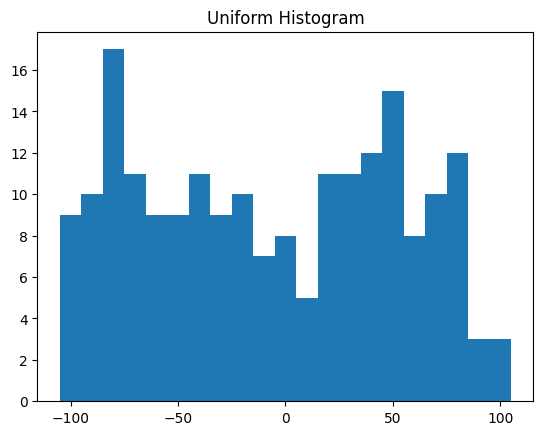

In [1]:
from typing import List, Dict
from collections import Counter
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def inverse_normal_cdf(p):
    return norm.ppf(p)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

random.seed(0)

uniform = [random.randrange(-100, 101) for _ in range(200)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(200)]

plot_histogram(uniform, 10, "Uniform Histogram")


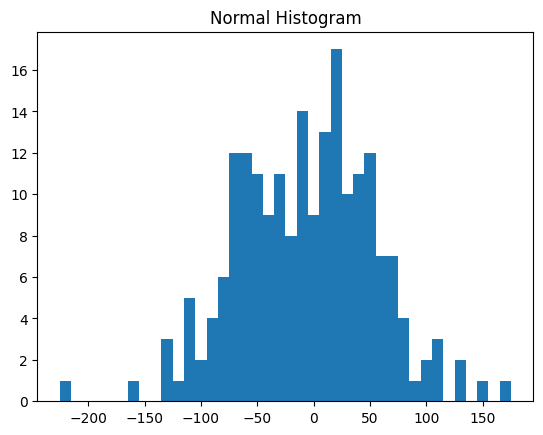

In [2]:
plot_histogram(normal, 10, "Normal Histogram")

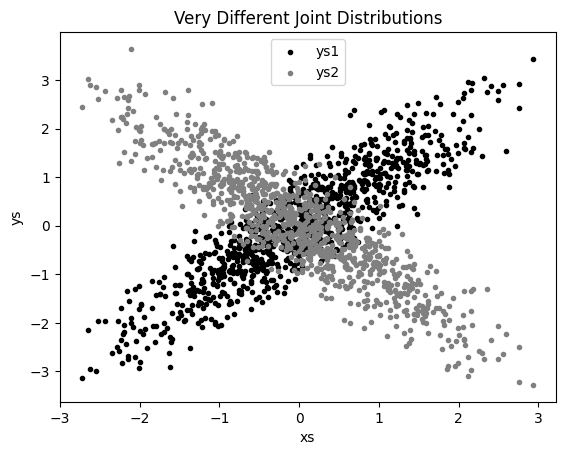

In [3]:
import random

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return random.gauss(0, 1)  # 평균이 0이고 표준 편차가 1인 정규 분포에서의 난수 생성

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

import matplotlib.pyplot as plt

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

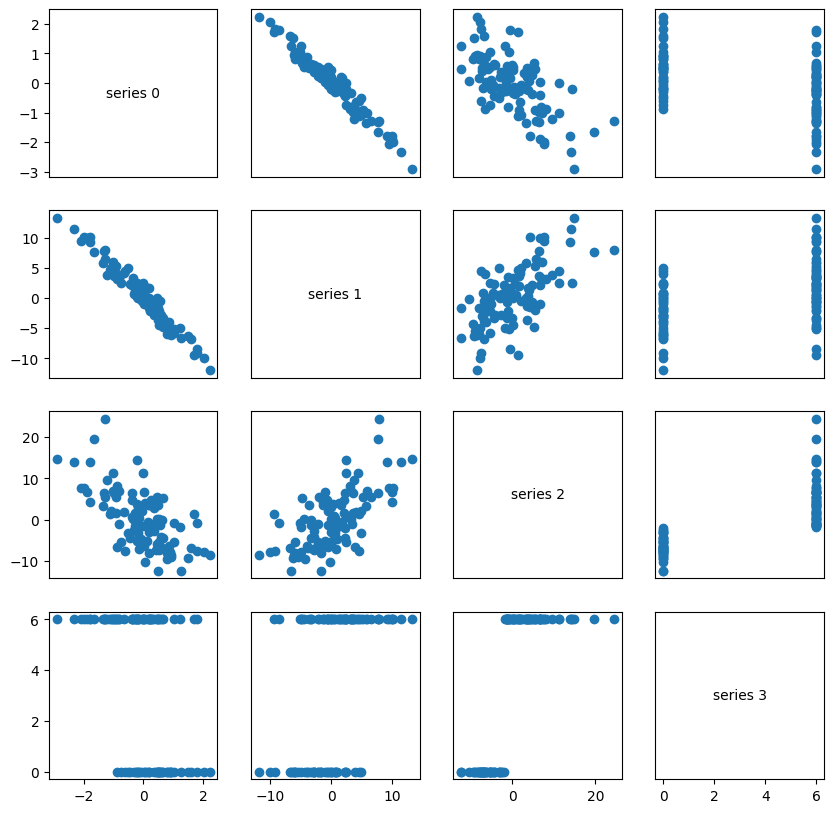

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

def random_normal():
    """Returns a random draw from a standard normal distribution"""
    return random.gauss(0, 1)

def random_row():
    row = [None, None, None, None]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

def shape(data):
    """Returns the shape of the data as (num_rows, num_columns)"""
    num_rows = len(data)
    num_columns = len(data[0]) if data else 0
    return num_rows, num_columns
def get_column(data, i):
    """Returns the ith column of data (as a list)"""
    return [data[row][i] for row in range(len(data))]

def correlation(column1, column2):
    """Returns the correlation between two columns of data"""
    return np.corrcoef(column1, column2)[0, 1]

def make_matrix(num_rows, num_columns, entry_fn):
    """Returns a num_rows x num_columns matrix
    whose (i, j)th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_columns)]
            for i in range(num_rows)]

def correlation_matrix(data):
    """Returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    num_rows, num_columns = shape(data)

    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))

    return make_matrix(num_columns, num_columns, matrix_entry)

num_points = 100

# 가상의 데이터 생성
random.seed(0)
data = [random_row() for _ in range(num_points)]

# 상관 행렬 계산
correlation_mat = correlation_matrix(data)

# 시각화 (산점도 행렬)
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns, figsize=(10, 10))

for i in range(num_columns):
    for j in range(num_columns):
        if i != j:
            ax[i, j].scatter(get_column(data, j), get_column(data, i))
        else:
            ax[i, j].annotate("series " + str(i), (0.5, 0.5),
                              xycoords='axes fraction',
                              ha="center", va="center")
        
        if i < num_columns - 1:
            ax[i, j].xaxis.set_visible(False)
        if j > 0:
            ax[i, j].yaxis.set_visible(False)

ax[-1, -1].set_xlim(ax[0, -1].get_xlim())
ax[0, 0].set_ylim(ax[0, 1].get_ylim())

plt.show()

In [5]:
import numpy as np
import pandas as pd

file_in = './datasets/titanic.csv'

titanic_df = pd.read_csv(file_in)

In [6]:
titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
titanic_df.shape

(891, 12)

In [8]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
titanic_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
pd.set_option('display.max_columns',4)
titanic_df.head()

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


In [13]:
pd.set_option('display.max_columns',None)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
print(titanic_df.index.name)

None


In [17]:
titanic_df.set_index("PassengerId", inplace=True)
print(titanic_df.index.name)

PassengerId


In [18]:
titanic_df.head()

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_df.shape

(891, 11)

In [20]:
titanic_df_target =  titanic_df.loc[:,['Survived']]
titanic_df_features = titanic_df.drop(['Survived'], axis = 1)

In [21]:
titanic_df_target['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
titanic_df_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

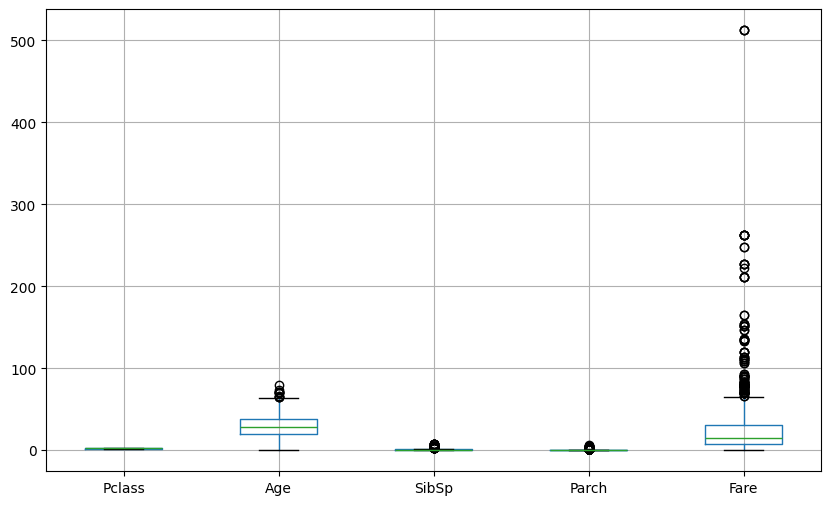

In [23]:
titanic_df_features.boxplot(figsize=(10,6))

# 데이터 변환(Data Transformation)

In [24]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 생성 (예시)
data = [[10], [5], [3], [2], [8]]

# 최소-최대 정규화 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print("정규화된 데이터:")
print(scaled_data)

정규화된 데이터:
[[1.   ]
 [0.375]
 [0.125]
 [0.   ]
 [0.75 ]]


In [25]:
from sklearn.preprocessing import StandardScaler

# 데이터 생성 (예시)
data = [[10], [5], [3], [2], [8]]

# 표준화 적용
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print("표준화된 데이터:")
print(standardized_data)

표준화된 데이터:
[[ 1.46341823]
 [-0.19955703]
 [-0.86474714]
 [-1.19734219]
 [ 0.79822813]]


## Q
```
다음 데이터세트는 diamonds.csv” 이다. Min-Max 정규화하라.

	carat	cut	color	clarity	depth	table	price	x	y	z
0	0.23	Ideal	E	SI2	61.5	55.0	326	3.95	3.98	2.43
1	0.21	Premium	E	SI1	59.8	61.0	326	3.89	3.84	2.31


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/diamonds.csv")
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [27]:
df_nums = df.select_dtypes(include = "number")
arr_nums_nor = MinMaxScaler().fit_transform(df_nums)
arr_nums_nor[:2, ]

array([[0.00623701, 0.51388889, 0.23076923, 0.        , 0.36778399,
        0.06757216, 0.07641509],
       [0.002079  , 0.46666667, 0.34615385, 0.        , 0.36219739,
        0.06519525, 0.07264151]])

In [28]:
df_nums_nor = pd.DataFrame(arr_nums_nor, columns = df_nums.columns)
df_nums_nor.head(2)

,carat,depth,table,price,x,y,z
0,0.006237,0.513889,0.230769,0.0,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.0,0.362197,0.065195,0.072642


In [29]:
df_nums_nor.agg(["min", "max"])

,carat,depth,table,price,x,y,z
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
model_nor2 = MinMaxScaler().fit(df_nums)
arr_nums_nor2 = model_nor2.transform(df_nums)
arr_nums_nor2[:2, ]

array([[0.00623701, 0.51388889, 0.23076923, 0.        , 0.36778399,
        0.06757216, 0.07641509],
       [0.002079  , 0.46666667, 0.34615385, 0.        , 0.36219739,
        0.06519525, 0.07264151]])

In [31]:
print(model_nor2.data_min_)
## array([2.00e-01, 4.30e+01, 4.30e+01, 3.26e+02, 0.00e+00, 0.00e+00, 0.00e+00])

print(model_nor2.data_max_)
## array([5.0100e+00, 7.9000e+01, 9.5000e+01, 1.8823e+04, 1.0740e+01, 5.8900e+01, 3.1800e+01])

print(model_nor2.data_range_)
## array([4.8100e+00, 3.6000e+01, 5.2000e+01, 1.8497e+04, 1.0740e+01, 5.8900e+01, 3.1800e+01])

print(model_nor2.feature_names_in_)
## array(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype=object)

[2.00e-01 4.30e+01 4.30e+01 3.26e+02 0.00e+00 0.00e+00 0.00e+00]
[5.0100e+00 7.9000e+01 9.5000e+01 1.8823e+04 1.0740e+01 5.8900e+01
 3.1800e+01]
[4.8100e+00 3.6000e+01 5.2000e+01 1.8497e+04 1.0740e+01 5.8900e+01
 3.1800e+01]
['carat' 'depth' 'table' 'price' 'x' 'y' 'z']


In [32]:
arr_nums_inv = model_nor2.inverse_transform(arr_nums_nor2)
arr_nums_inv[:2, ]

array([[2.30e-01, 6.15e+01, 5.50e+01, 3.26e+02, 3.95e+00, 3.98e+00,
        2.43e+00],
       [2.10e-01, 5.98e+01, 6.10e+01, 3.26e+02, 3.89e+00, 3.84e+00,
        2.31e+00]])

In [33]:
df_nums_inv = pd.DataFrame(arr_nums_inv, columns = df_nums.columns)
df_nums_inv.head(2)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31


## Q
```
다음 데이터세트는 diamonds.csv” 이다. Standardization를 하라.

	carat	cut	color	clarity	depth	table	price	x	y	z
0	0.23	Ideal	E	SI2	61.5	55.0	326	3.95	3.98	2.43
1	0.21	Premium	E	SI1	59.8	61.0	326	3.89	3.84	2.31


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/diamonds.csv")
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [35]:
df_nums = df.select_dtypes(include = "number")
arr_nums_nor = StandardScaler().fit_transform(df_nums)
arr_nums_nor[:2, ]
## array([[-1.19816781, -0.17409151, -1.09967199, -0.90409516, -1.58783745, -1.53619556, -1.57112919],
##        [-1.24036129, -1.36073849,  1.58552871, -0.90409516, -1.64132529, -1.65877419, -1.74117497]])

array([[-1.19816781, -0.17409151, -1.09967199, -0.90409516, -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129, -1.36073849,  1.58552871, -0.90409516, -1.64132529,
        -1.65877419, -1.74117497]])

In [36]:
df_nums_nor = pd.DataFrame(arr_nums_nor, columns = df_nums.columns)
df_nums_nor.head(2)

,carat,depth,table,price,x,y,z
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175


In [37]:
model_nor3 = StandardScaler().fit(df_nums)
arr_nums_nor3 = model_nor3.transform(df_nums)
arr_nums_nor3[:2, ]
## array([[-1.19816781, -0.17409151, -1.09967199, -0.90409516, -1.58783745, -1.53619556, -1.57112919],
##        [-1.24036129, -1.36073849,  1.58552871, -0.90409516, -1.64132529, -1.65877419, -1.74117497]])

array([[-1.19816781, -0.17409151, -1.09967199, -0.90409516, -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129, -1.36073849,  1.58552871, -0.90409516, -1.64132529,
        -1.65877419, -1.74117497]])

In [38]:
pd.DataFrame([model_nor3.mean_,
              model_nor3.var_,
              model_nor3.scale_],
             index = ["mean", "var", "std"],
             columns = model_nor3.feature_names_in_)

,carat,depth,table,price,x,y,z
mean,0.797940,61.749405,57.457184,3.932800e+03,5.731157,5.734526,3.538734
var,0.224682,2.052366,4.992856,1.591533e+07,1.258324,1.304447,0.498002
std,0.474007,1.432608,2.234470,3.989403e+03,1.121750,1.142124,0.705692


In [39]:
arr_nums_inv = model_nor3.inverse_transform(arr_nums_nor3)
arr_nums_inv[:2, ]
## array([[2.30e-01, 6.15e+01, 5.50e+01, 3.26e+02, 3.95e+00, 3.98e+00, 2.43e+00],
##        [2.10e-01, 5.98e+01, 6.10e+01, 3.26e+02, 3.89e+00, 3.84e+00, 2.31e+00]])

array([[2.30e-01, 6.15e+01, 5.50e+01, 3.26e+02, 3.95e+00, 3.98e+00,
        2.43e+00],
       [2.10e-01, 5.98e+01, 6.10e+01, 3.26e+02, 3.89e+00, 3.84e+00,
        2.31e+00]])

## Q
```
mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.mtcars

In [40]:
import pandas as pd # pandas import

df = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/mtcars.csv') # df에 mtcars.csv를 읽어 데이터프레임으로 저장
df.head() # df의 앞에서 5개 데이터 출력

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


방법 1
sklearn의 MinMaxScaler를 이용해서 변환

In [41]:
from sklearn.preprocessing import MinMaxScaler # sklearn의 min-max scaler import

scaler = MinMaxScaler() # MinMaxScaler 객체 생성

# scaler에 데이터를 넣어서 모델을 만들고 값을 덮어씨움
df['qsec'] = scaler.fit_transform(df[['qsec']])

# qsec가 0.5보다 큰 데이터만 색인해서 길이를 구함
answer = len(df[df['qsec']>0.5])
print(answer)

9


방법 2
Min-Max Scale을 수식으로 만들어서 변환시킴

In [42]:
df['qsec'] = (df['qsec'] - df['qsec'].min()) / (df['qsec'].max() - df['qsec'].min())

answer = len(df[df['qsec']>0.5])
print(answer)

9


# 데이터 축소(Data Reduction)

주성분 설명 분산 비율: [0.98646691 0.01353309]


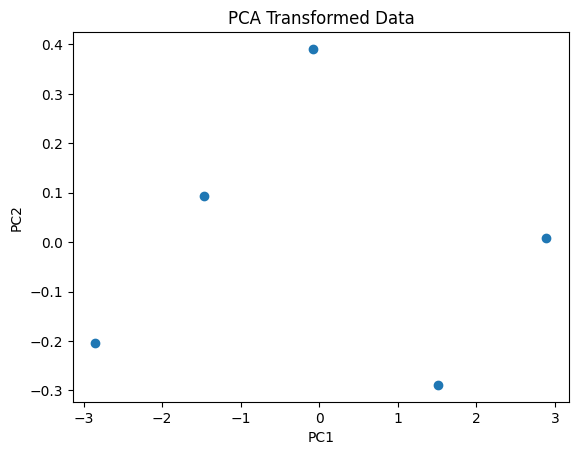

In [43]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [1, 1, 1, 0, 0]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# PCA 모델 생성 및 학습
pca = PCA(n_components=2)  # 주성분 개수 설정
pca.fit(df)

# 주성분 변환
transformed_data = pca.transform(df)

# 주성분으로 변환된 데이터프레임 생성
df_transformed = pd.DataFrame(transformed_data, columns=['PC1', 'PC2'])

# 주성분 분석 결과 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("주성분 설명 분산 비율:", explained_variance_ratio)

# 시각화 (2차원으로 축소한 경우)
plt.scatter(df_transformed['PC1'], df_transformed['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Transformed Data')
plt.show()

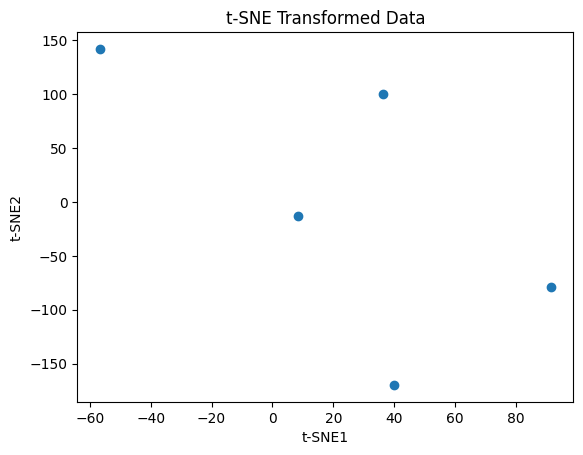

In [44]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [1, 1, 1, 0, 0]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# t-SNE 모델 생성 및 학습
tsne = TSNE(n_components=2, perplexity=3, random_state=42)  # perplexity 값을 3으로 변경
tsne_result = tsne.fit_transform(df)

# t-SNE 결과 확인
df_tsne = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])

# 시각화
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'])
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Transformed Data')
plt.show()

In [45]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Sample dataset
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [1, 1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Applying VarianceThreshold to select features
selector = VarianceThreshold(threshold=0.2)  # Set the variance threshold
selected_features = selector.fit_transform(df)

# Get the indices of the selected features
indices = selector.get_support(indices=True)
print("Selected feature indices:", indices)

# New dataset with selected features
df_selected = df.iloc[:, indices]
print("New dataset with selected features:")
print(df_selected)

Selected feature indices: [0 1 2]
New dataset with selected features:
   Feature1  Feature2  Feature3
0         1         5         1
1         2         4         1
2         3         3         1
3         4         2         0
4         5         1         0


In [46]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 가상 데이터 생성
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# 모델 초기화
model = LogisticRegression()

# RFE 초기화
rfe = RFE(model, n_features_to_select=5)  # 선택할 특성의 개수

# RFE 적합
fit = rfe.fit(X, y)

# 선택된 특성 랭킹
print("특성 랭킹:", fit.ranking_)

# 선택된 특성 마스크
print("선택된 특성 마스크:", fit.support_)

# 선택된 특성으로 데이터 변환
X_selected = rfe.transform(X)
print("선택된 특성만 포함된 새로운 데이터셋:")
print(X_selected)

특성 랭킹: [1 1 1 1 3 4 1 5 2 6]
선택된 특성 마스크: [ True  True  True  True False False  True False False False]
선택된 특성만 포함된 새로운 데이터셋:
[[-1.14052601  1.35970566  0.86199147  0.84609208  1.75479418]
 [-0.07873421 -1.32933233  0.6273745  -1.19300559  0.49799829]
 [ 0.80742726  0.73019848 -1.28568005  0.88948365  0.04808495]
 [ 0.58846525 -0.3751207  -0.57500215 -0.14951801  0.24368721]
 [ 1.63631177 -1.64060704 -1.36045573 -0.94116325  0.13074058]
 [-0.47936995 -1.08324727  1.02255619 -1.09939128  1.36687427]
 [ 2.48904785 -2.52343407 -2.05832072 -1.45612516 -1.02438764]
 [-0.23938468  1.56931739 -0.3313761   1.306542   -1.65485667]
 [ 0.67287309 -0.72427983 -0.53963044 -0.43066755  1.09877685]
 [-1.22823431  2.38869353  0.55942643  1.7240021  -0.57689187]
 [-0.82741596  0.88629356  0.66530077  0.52576893  0.48937456]
 [ 1.6253749   0.06194498 -2.02632079  0.55253544 -0.14436041]
 [ 0.40238353  1.06173727 -0.91916686  1.05688647  1.87679581]
 [ 0.30759353  0.01722979 -0.38566776  0.1094067   0.662

In [47]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

# 가상 데이터 생성
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Lasso 모델 초기화 (L1 정규화 사용)
lasso = Lasso(alpha=0.1)  # alpha는 정규화 강도를 조절하는 매개변수

# Lasso 모델에 데이터를 적합하여 특성 선택 수행
lasso.fit(X, y)

# 선택된 특성 확인
selected_features = lasso.coef_ != 0
print("선택된 특성 마스크:", selected_features)

# 선택된 특성으로 새로운 데이터셋 생성
X_selected = X[:, selected_features]
print("새로운 데이터셋 크기:", X_selected.shape)


선택된 특성 마스크: [ True  True  True  True  True  True  True  True  True  True]
새로운 데이터셋 크기: (100, 10)


# 특성 공학(Feature Engineering)

In [48]:
import pandas as pd

# 샘플 데이터셋
data = {
    'color': ['red', 'blue', 'green', 'red', 'yellow']
}

# DataFrame 생성
df = pd.DataFrame(data)

# 원핫 인코딩 적용
df_encoded = pd.get_dummies(df['color'], prefix='color')

# 변환된 데이터 확인
print("변환된 데이터:")
print(df_encoded)

변환된 데이터:
   color_blue  color_green  color_red  color_yellow
0       False        False       True         False
1        True        False      False         False
2       False         True      False         False
3       False        False       True         False
4       False        False      False          True


In [49]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 예시
categories = ['고양이', '개', '고양이', '새', '개']

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 수행
encoded_labels = label_encoder.fit_transform(categories)

print(encoded_labels)

[1 0 1 2 0]


In [50]:
import pandas as pd

# 범주형 데이터 예시
data = {'pet': ['고양이', '개', '새', '고양이', '개']}
df = pd.DataFrame(data)

# 더미 변수화 (원-핫 인코딩)
dummy_variables = pd.get_dummies(df['pet'])

# 원본 데이터프레임과 더미 변수를 합치기
df_encoded = pd.concat([df, dummy_variables], axis=1)
print(df_encoded)

   pet      개    고양이      새
0  고양이  False   True  False
1    개   True  False  False
2    새  False  False   True
3  고양이  False   True  False
4    개   True  False  False


# 데이터 분할(Data Splitting)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X, y = data.data, data.target

# 데이터 분할 (70% 학습용, 30% 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.2]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.  2.7 5.1 1.6]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.5 2.5 4.  1.3]
 [4.4 2.9 1.4 0.2]
 [4.3 3.  1.

## 데이터 세트 분할과 교차검증

In [52]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [53]:
# iris - train, validation, test dataset으로 분리
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier #모델-결정트리
from sklearn.metrics import accuracy_score # 모델 평가함수 -> 정확도
from sklearn.model_selection import train_test_split # 데이터셋을 나누는 함수.

iris_data = load_iris()
iris_data.keys()
X, y = iris_data.data, iris_data.target
X.shape, y.shape

import numpy as np
# train, test로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, #기본:0.25
                                                    stratify=y, #target의 class비율에 맞춰서 분리
                                                    random_state=1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(np.unique(y_train, return_counts=True))

(120, 4) (120,) (30, 4) (30,)
(array([0, 1, 2]), array([40, 40, 40], dtype=int64))


In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, stratify=y_train, 
                                                  random_state=1)
X_train.shape, X_val.shape, X_test.shape

((96, 4), (24, 4), (30, 4))

In [55]:
# 모델 생성
tree = DecisionTreeClassifier()
# 모델 학습 - train set
tree.fit(X_train, y_train)
# 예측 및 평가 - train/validation set
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

train_score = accuracy_score(y_train, pred_train)
val_score = accuracy_score(y_val, pred_val)
print("train set의 예측결과: {}, validation set의 예측결과: {}".format(train_score, val_score))
# ==> train set의 예측결과: 1.0, validation set의 예측결과: 0.9166666666666666

# 최종 평가 - test
pred_test = tree.predict(X_test)
test_score = accuracy_score(y_test, pred_test)
print("최종평가(test set): {}".format(test_score))
#==> 최종평가(test set): 0.9666666666666667

train set의 예측결과: 1.0, validation set의 예측결과: 0.9166666666666666
최종평가(test set): 0.9666666666666667


In [56]:
#KFold
#•지정한 개수(K)만큼 분할한다.
from sklearn.model_selection import KFold

# K-Fold K-개수, fold 나눠진 데이터셋 - 5개
kfold = KFold(n_splits=5)
acc_train_list = [] # 평가지표들을 저장할 리스트
acc_test_list = []

ex = kfold.split(X)
print(type(ex))
next(ex) # 반복자의 다음 요소 구하기
# ==> (array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
#         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
#         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
#         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
#         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
#         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
#        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
#        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
#        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
#        147, 148, 149]),
# array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
#        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

<class 'generator'>


(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

In [57]:
for train_index, test_index in kfold.split(X):
    # index를 이용해 훈련/검증 데이터셋 추출
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # 모델생성
    tree = DecisionTreeClassifier()
    # 학습
    tree.fit(X_train, y_train)
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)

    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

acc_test_list, np.mean(acc_test_list)
# ==> ([1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.8], 0.9199999999999999)

([1.0,
  0.9666666666666667,
  0.8666666666666667,
  0.9333333333333333,
  0.7666666666666667],
 0.9066666666666666)

In [58]:
from sklearn.model_selection import StratifiedKFold

s_fold = StratifiedKFold(n_splits=3)
acc_train_list = []
acc_test_list = []

ex = s_fold.split(X, y) #label의 class 별 동일한 분포로 나눈다.
type(ex)

generator

In [59]:
for train_index, test_index in s_fold.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # 모델생성
    tree = DecisionTreeClassifier()
    # 학습
    tree.fit(X_train, y_train)
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)

    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

acc_train_list, np.mean(acc_train_list)
#==> [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

acc_test_list, np.mean(acc_test_list)
#==> ([0.98, 0.92, 0.96, 0.98, 0.92, 0.96], 0.9533333333333333)

([0.98, 0.92, 0.96], 0.9533333333333333)

In [60]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier()

score_list = cross_val_score(tree, X, y, scoring='accuracy', cv=3)

score_list
#==> array([0.98, 0.94, 0.98])
np.mean(score_list)
# ==> 0.9666666666666667

0.9666666666666667

## 교차검증 모델

### 교차검증 모델 만들기

In [61]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋을 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

In [62]:
# 로지스틱 회귀 객체를 만듭니다.
logit = LogisticRegression()

# 표준화 객체를 생성합니다.
standardizer = StandardScaler()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증을 만듭니다.
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
print("평균 : {}".format(cv_results.mean()))

# 10개 폴드의 점수를 모두 확인하기
print("10개 폴드의 점수 : {}".format(cv_results))

평균 : 0.9693916821849783
10개 폴드의 점수 : [0.97777778 0.98888889 0.96111111 0.94444444 0.97777778 0.98333333
 0.95555556 0.98882682 0.97765363 0.93854749]


### k-폴드 교차 검증 수행`

In [63]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# 훈련 세트로 standardizer의 fit 메서드를 호출합니다.
standardizer.fit(features_train)

# 훈련 세트와 테스트 세트에 모두 적용합니다.
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

# 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차검증
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
print("평균 : {}".format(cv_results.mean()))

# 10개 폴드의 점수를 모두 확인하기
print("10개 폴드의 점수 : {}".format(cv_results))

평균 : 0.9693916821849783
10개 폴드의 점수 : [0.97777778 0.98888889 0.96111111 0.94444444 0.97777778 0.98333333
 0.95555556 0.98882682 0.97765363 0.93854749]


### ShuffleSplit

In [64]:
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다.
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용


# 평균을 계산합니다.
print("평균 : {}".format(cv_results.mean()))

# 10개 폴드의 점수를 모두 확인하기
print("10개 검증 점수 개수 : {}".format(len(cv_results)))

평균 : 0.9630555555555554
10개 검증 점수 개수 : 10


### RepeatedKFold

In [65]:
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기를 만듭니다.
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rfk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
print("평균 : {}".format(cv_results.mean()))

# 10개 폴드의 점수를 모두 확인하기
print("10개 검증 점수 개수 : {}".format(len(cv_results)))

평균 : 0.9695065176908755
10개 검증 점수 개수 : 50


## Q
```
다음과 같이 데이터세트를 준비합니다.

df = pd.read_csv("diamonds.csv")
df.head(2)


“price” 변수를 종속변수로 취급해, 종속변수와 나머지 변수를 분리해 봅니다.


In [66]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/diamonds.csv")

df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [67]:
df_X = df.copy()
ser_y = df_X.pop("price")
df_X.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31


In [68]:
ser_y.head(2)

0    326
1    326
Name: price, dtype: int64

## Q
```
앞선 Q1을 참조하여, diamonds.csv 파일을 훈련 데이터 셋과 테스트 데이터 셋을 8:2로 나눠봅니다.


In [69]:
df_tr_X, df_te_X, ser_tr_y, ser_te_y = train_test_split(df_X, 
                                                        ser_y,
                                                        train_size = 0.8,
                                                        random_state = 123)
len(df_tr_X), len(df_te_X), len(ser_tr_y), len(ser_te_y)

(43152, 10788, 43152, 10788)

## Q
```
데이터세트를 분할하기 위해 “Xgrp” 변수명으로 별도의 변수가 준비되었을 경우, 필터링을 통해 데이터 세트를 분리해 보자.
![image.png](attachment:0293a87a-3b48-4afd-a8ea-b9b20c8f7ebb.png)![image.png](attachment:2c1c7639-9608-466b-a26a-6c5d294de406.png)![image.png](attachment:2b15b6da-c33a-48c8-9349-450c93b520b1.png)	col1	col2	Xgrp
0	0	100	train
1	1	101	train
2	2	102	train
3	3	103	test
4	4	104	test


In [70]:
import pandas as pd

df1 = pd.DataFrame(dict(col1 = range(5),
                        col2 = range(100, 105),
                        Xgrp = ["train"] * 3 + ["test"] * 2))
df1

,col1,col2,Xgrp
0,0,100,train
1,1,101,train
2,2,102,train
3,3,103,test
4,4,104,test


In [71]:
df1_train = df1.loc[df1["Xgrp"] == "train", ]
df1_test  = df1.loc[df1["Xgrp"] == "test", ]
len(df1_train), len(df1_test)

(3, 2)

## Q
```
데이터세트가 다음과 같을 때, “ID”변수의 값이 5의 배수가 아닌 행은 “df2_train” 객체에 할당하고 “ID”변수의 값이 5의 배수인 행은 “df2_test” 객체에 할당하시오.

	ID	value
0	1	100
1	2	101
2	3	102
3	4	103
4	5	104


In [72]:
import pandas as pd

df2 = pd.DataFrame(dict(ID = range(1, 6),
                        value = range(100, 105)))
df2

,ID,value
0,1,100
1,2,101
2,3,102
3,4,103
4,5,104


In [73]:
df2_train = df2.loc[df2["ID"] % 5 != 0, ]
df2_test  = df2.loc[df2["ID"] % 5 == 0, ]
len(df2_train), len(df2_test)

(4, 1)

## Q
```

데이터세트가 다음과 같이 변수에 문자와 숫자가 섞여있을 경우, “ID_num”변수를 기준으로 3의 배수 여부에 따라 데이터를 분리하시오.
	ID	value
0	lot_001	100
1	lot_002	101
2	lot_003	102
3	lot_004	103
4	lot_005	104
5	lot_006	105
6	lot_007	106
7	lot_008	107
8	lot_009	108
9	lot_010	109
10	lot_011	110

In [74]:
import pandas as pd

df3 = pd.DataFrame(dict(ID = range(1, 12),
                        value = range(100, 111)))
df3["ID"] = "lot_" + df3["ID"].astype("str").str.zfill(3)
df3

,ID,value
0,lot_001,100
1,lot_002,101
2,lot_003,102
3,lot_004,103
4,lot_005,104
5,lot_006,105
6,lot_007,106
7,lot_008,107
8,lot_009,108
9,lot_010,109


In [75]:
df3["ID_1"] = df3["ID"].str.replace("lot_", "")
df3["ID_2"] = df3["ID"].str.replace("[^0-9]", "", regex = True)
df3["ID_3"] = df3["ID"].str.split("_", expand = True)[1]
df3["ID_num"] = df3["ID_1"].astype("int")
df3

,ID,value,ID_1,ID_2,ID_3,ID_num
0,lot_001,100,001,001,001,1
1,lot_002,101,002,002,002,2
2,lot_003,102,003,003,003,3
3,lot_004,103,004,004,004,4
4,lot_005,104,005,005,005,5
5,lot_006,105,006,006,006,6
6,lot_007,106,007,007,007,7
7,lot_008,107,008,008,008,8
8,lot_009,108,009,009,009,9
9,lot_010,109,010,010,010,10


In [76]:
df3_train = df3.loc[df3["ID_num"] % 3 != 0, ]
df3_test  = df3.loc[df3["ID_num"] % 3 == 0, ]
len(df3_train), len(df3_test)

(8, 3)

## Q
```
데이터세트가 다음과 같이 변수에 문자와 숫자가 섞여있을 경우, “ID”변수의 값이 5의 배수가 아닌 행은 “df4_train” 객체에 할당하고 “ID”변수의 값이 5의 배수인 행은 “df4_test” 객체에 할당 분리하시오.


	ID	value
0	lotA81023	100
1	lotB0021	101
2	order_329145	102
3	order_12932_Z3	103
4	re-498	104


In [77]:
import pandas as pd

df4 = pd.DataFrame(dict(ID = ["lotA81023", "lotB0021", "order_329145", "order_12932_Z3", "re-498"],
                        value = range(100, 105)))
df4

,ID,value
0,lotA81023,100
1,lotB0021,101
2,order_329145,102
3,order_12932_Z3,103
4,re-498,104


In [78]:
df4["ID_1"] = df4["ID"].str.extract("([0-9]{3,})")
df4["ID_num"] = df4["ID_1"].astype("int")
df4

,ID,value,ID_1,ID_num
0,lotA81023,100,81023,81023
1,lotB0021,101,0021,21
2,order_329145,102,329145,329145
3,order_12932_Z3,103,12932,12932
4,re-498,104,498,498


In [79]:
df4_train = df4.loc[df4["ID_num"] % 5 != 0, ]
df4_test  = df4.loc[df4["ID_num"] % 5 == 0, ]
(len(df4_train), len(df4_test))

(4, 1)